### Please implement the code from this blogpost in this notebook: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [14]:
import pandas as pd
import numpy as np
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sms

In [15]:
data = {'years_of_experience': [1,2,3,4,5,6,7,8,9,10], 'sales': [45,50,60,80,110,150,200,300,500,1_000]}
data['sales'] = [x * 1_000 for x in data['sales']]
df = pd.DataFrame(data)

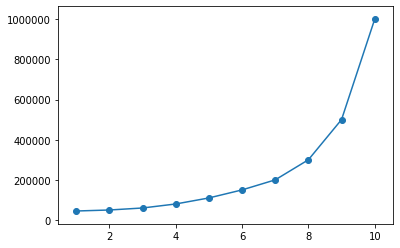

In [16]:
plt.plot(df.years_of_experience, df.sales);
plt.scatter(x = df.years_of_experience, y = df.sales)

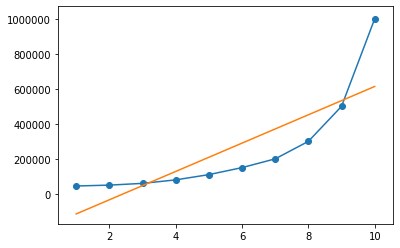

In [36]:
y = df.sales
x = df.years_of_experience
x = x[:, np.newaxis]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.plot(df.years_of_experience, df.sales);
plt.scatter(x = df.years_of_experience, y = df.sales);
plt.plot(df.years_of_experience, y_pred);

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Wed, 06 Nov 2019   Prob (F-statistic):            0.00383
Time:                        00:11:59   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.953e+05   1.25e+05     -1.565      0.156   -4.83e+05    9.24e+04
years_of_experience  8.088e+04   2.01e+04      4.021      0.004    3.45e+04    1.27e+05
==============================================================================
Omnibus:                        5.661   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.297
Skew:                           1.148   Prob(JB):                        0.317
Kurtosis:                       3.492   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

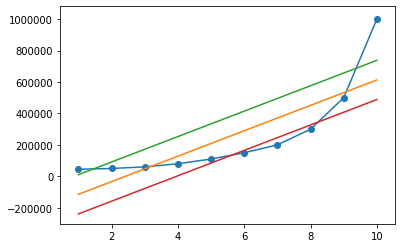

In [31]:
y = df.sales
x = df.years_of_experience
x = sms.add_constant(x)
fittest = sms.OLS(y,x).fit()
plt.plot(df.years_of_experience, df.sales);
plt.plot(df.years_of_experience, fittest.predict(x))
plt.plot(df.years_of_experience, fittest.predict(x) + fittest.bse[0])
plt.plot(df.years_of_experience, fittest.predict(x) - fittest.bse[0])
plt.scatter(x = df.years_of_experience, y = df.sales)
fittest.summary()